### 보조 축 활용 (2축 그래프 그리기)
- 객체에 twinx() 메소드를 적용하여 쌍둥이 객체를 만들고 
다른 객체에 저장
- ls = '- -' 옵션은 선 스타일을 점선으로 설정하는 옵션

- 남북한 발전량 데이터셋을 사용하여 보조 축을 설정하는 방법을 알아본다.
- 막대 그래프는 연도별 북한의 발전량 
- 선 그래프(보조 축) 북한 발전량의 전년 대비 증감률의 백분율 
- 증감률을 계산하기 위해 rename() 메소드로 '합계' 열 이름을 '총발전량' 으로 바꿈 
- shift() 메소드를 사용하여 '총 발전량' 열 데이터를 1행씩 뒤로 이동 시켜서 
'총 발전량 -1년' 열을 새로 생성 
- 두 열 데이터를 이용하여 '증감률'을 구하고 저장 

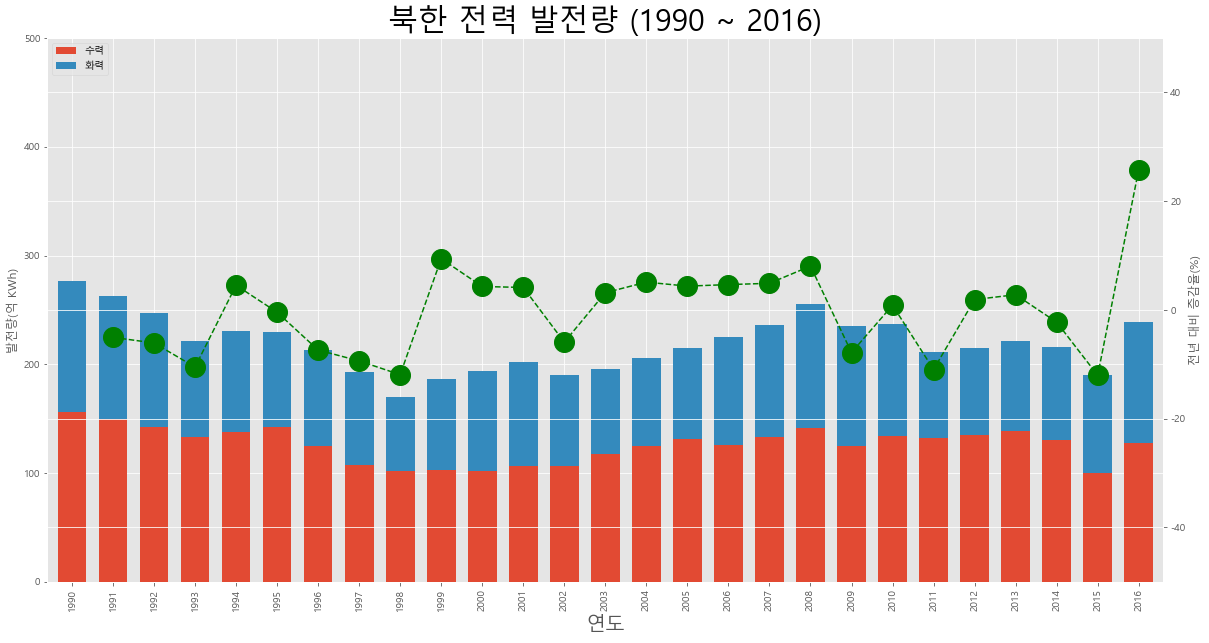

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환
path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\남북한발전전력량.xlsx'
df = pd.read_excel(path, engine='openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()